<img src='./灰色关联度.png'>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def ReadAndSaveDataByPandas(target_url = None,file_save_path = None ,save=False):

    if target_url !=None:
        target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")   
    if file_save_path != None:
        file_save_path = "./glass.csv"

    wine = pd.read_csv(target_url, header=0, sep=";")
    if save == True:
        wine.to_csv(file_save_path, index=False)

    return wine

#ReadAndSaveDataByPandas(target_url=True,file_save_path=True,save=True)
# 从硬盘读取数据进入内存
wine = pd.read_csv("./glass.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
import pandas as pd
from numpy import *
def GRA_ONE(DataFrame,m=0):
    gray= DataFrame
    #读取为df格式
    gray=(gray - gray.min()) / (gray.max() - gray.min())
    #标准化
    std=gray.iloc[:,m]#为标准要素
    ce=gray.iloc[:,0:]#为比较要素
    n=ce.shape[0]
    m=ce.shape[1]#计算行列

    #与标准要素比较，相减
    a=zeros([m,n])
    for i in range(m):
        for j in range(n):
            a[i,j]=abs(ce.iloc[j,i]-std[j])

    #取出矩阵中最大值与最小值
    c=amax(a)
    d=amin(a)

    #计算值
    result=zeros([m,n])
    for i in range(m):
        for j in range(n):
            result[i,j]=(d+0.5*c)/(a[i,j]+0.5*c)

    #求均值，得到灰色关联值
    result2=zeros(m)
    for i in range(m):
            result2[i]=mean(result[i,:])
    RT=pd.DataFrame(result2)
    return RT

def GRA(DataFrame):
    list_columns = [str(s) for s in range(len(DataFrame.columns)) if s not in [None]]
    df_local = pd.DataFrame(columns=list_columns)
    for i in range(len(DataFrame.columns)):
        df_local.iloc[:,i] = GRA_ONE(DataFrame,m=i)[0]
    return df_local

In [5]:
data_wine_gra = GRA(wine)
# data_wine_gra.to_csv(path+"GRA.csv") 存储结果到硬盘
data_wine_gra

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.769306,0.812387,0.701253,0.724887,0.742105,0.725527,0.748950,0.715603,0.773843,0.747421,0.710177
1,0.763586,1.000000,0.697659,0.745058,0.766992,0.773070,0.767780,0.697094,0.744125,0.785006,0.743394,0.681713
2,0.807275,0.697659,1.000000,0.738369,0.751371,0.740039,0.752953,0.687499,0.683898,0.775368,0.738423,0.669089
3,0.698302,0.748637,0.741871,1.000000,0.906416,0.807615,0.858757,0.568263,0.607333,0.828459,0.710262,0.561595
4,0.718607,0.767264,0.751648,0.904999,1.000000,0.813098,0.858236,0.576566,0.614320,0.862755,0.726033,0.568922
5,0.740846,0.777570,0.744831,0.808676,0.816643,1.000000,0.855518,0.639219,0.679397,0.815513,0.738493,0.631487
6,0.721009,0.769497,0.754659,0.857666,0.859213,0.853501,1.000000,0.592666,0.634509,0.816938,0.706328,0.594546
7,0.752257,0.707521,0.698054,0.576341,0.589057,0.644768,0.602719,1.000000,0.779693,0.644097,0.655279,0.761269
8,0.708985,0.744125,0.683898,0.602613,0.613942,0.673674,0.632211,0.771187,1.000000,0.666292,0.723045,0.771055
9,0.768129,0.785006,0.775368,0.825769,0.862575,0.811626,0.815475,0.632208,0.666292,1.000000,0.770830,0.613749


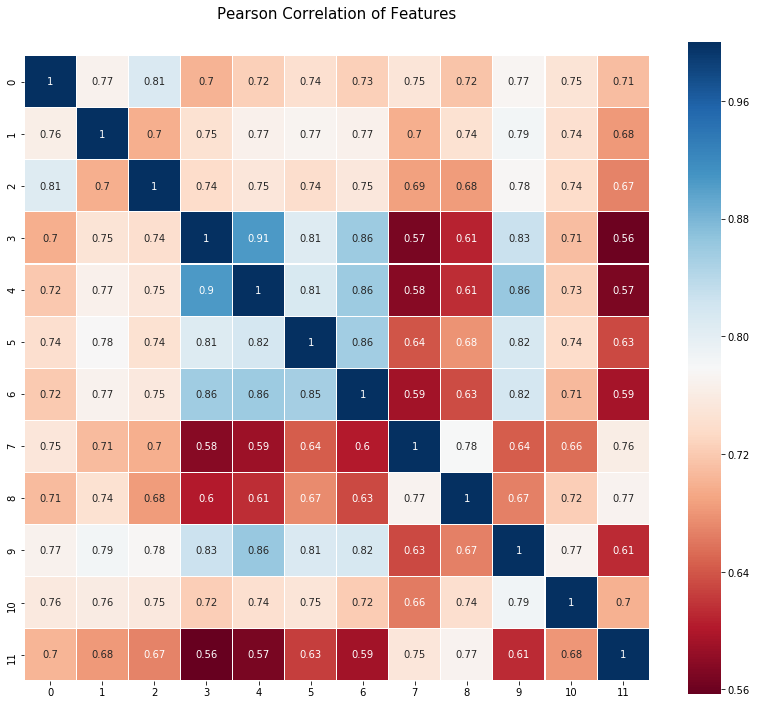

In [6]:
# 灰色关联结果矩阵可视化
import seaborn as sns
%matplotlib inline
def ShowGRAHeatMap(DataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(DataFrame.astype(float),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()
ShowGRAHeatMap(data_wine_gra)

In [8]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397
